In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from functools import reduce

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORT SURVEY DATABASE

In [4]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\SurveyData.csv"

In [5]:
survey = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,30,31,34,35,44,49,53,54,55,56,57,58,59,71,72,73,74,75,76,91,92,93,94,95,96,97,98,99,101,115) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
survey_table = survey

In [7]:
survey_table

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
1,1.12971E+11,XX,4,4,4,4,2,4,4,4,...,B,B,B,B,B,B,A,A,A,2.238814299
2,1.94869E+11,XX,4,3,5,4,4,4,5,4,...,B,B,B,B,A,A,A,A,A,2.238814299
3,1.52966E+11,XX,5,5,5,5,2,5,5,2,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285
4,1.93041E+11,XX,2,2,4,1,3,2,2,1,...,B,B,B,B,A,A,B,A,A,1.756431349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4,4,5,4,3,4,4,3,...,B,B,B,B,B,C,A,B,B,2.48538
557775,1.02163e+11,ST,4,4,4,4,2,3,3,4,...,B,B,B,B,B,C,A,B,D,1.67791
557776,1.64068e+11,ST,5,5,4,4,3,5,5,5,...,B,B,B,B,B,C,A,B,B,3.58316
557777,1.55255e+11,ST,5,5,5,5,4,5,5,5,...,B,B,B,B,B,C,B,B,A,2.73418


In [8]:
survey_table.columns = survey_table.iloc[0]

In [9]:
survey_table = survey_table[1:]

In [10]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
1,1.12971E+11,XX,4,4,4,4,2,4,4,4,...,B,B,B,B,B,B,A,A,A,2.238814299
2,1.94869E+11,XX,4,3,5,4,4,4,5,4,...,B,B,B,B,A,A,A,A,A,2.238814299
3,1.52966E+11,XX,5,5,5,5,2,5,5,2,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285
4,1.93041E+11,XX,2,2,4,1,3,2,2,1,...,B,B,B,B,A,A,B,A,A,1.756431349
5,1.46656E+11,XX,4,4,4,4,4,2,4,2,...,B,B,B,A,B,A,B,B,A,1.756431349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4,4,5,4,3,4,4,3,...,B,B,B,B,B,C,A,B,B,2.48538
557775,1.02163e+11,ST,4,4,4,4,2,3,3,4,...,B,B,B,B,B,C,A,B,D,1.67791
557776,1.64068e+11,ST,5,5,4,4,3,5,5,5,...,B,B,B,B,B,C,A,B,B,3.58316
557777,1.55255e+11,ST,5,5,5,5,4,5,5,5,...,B,B,B,B,B,C,B,B,A,2.73418


**REMAP AGENCY NAME

In [11]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy','DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [12]:
survey_table['AGENCY'] = survey_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
groupby_survey_table = survey_table.groupby('AGENCY').size().reset_index()

In [15]:
groupby_survey_table

,AGENCY,0
0,All Other Agencies,9703
1,Department of Agriculture,43332
2,Department of Commerce,21009
3,Department of Education,2698
4,Department of Energy,8587
5,Department of Health and Human Services,50317
6,Department of Homeland Security,73070
7,Department of Housing and Urban Development,4866
8,Department of Justice,25866
9,Department of Labor,7550


**CREATE INDEX SCORE COLUMN LISTS

*My Work Experience

In [16]:
my_work_experience =['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']

In [17]:
survey_table[my_work_experience] = survey_table[my_work_experience].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
survey_table[my_work_experience] = survey_table[my_work_experience].apply(pd.to_numeric, errors='coerce')

In [19]:
survey_table['my_work_experience_index'] = survey_table[my_work_experience].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT,AGENCY,my_work_experience_index
1,1.12971E+11,XX,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,...,B,B,B,B,A,A,A,2.238814299,All Other Agencies,3.846154
2,1.94869E+11,XX,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,...,B,B,A,A,A,A,A,2.238814299,All Other Agencies,3.923077
3,1.52966E+11,XX,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,...,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285,All Other Agencies,4.076923
4,1.93041E+11,XX,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,...,B,B,A,A,B,A,A,1.756431349,All Other Agencies,2.615385
5,1.46656E+11,XX,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,B,A,B,A,B,B,A,1.756431349,All Other Agencies,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,C,A,B,B,2.48538,Department of State,3.461538
557775,1.02163e+11,ST,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,B,B,B,C,A,B,D,1.67791,Department of State,3.384615
557776,1.64068e+11,ST,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,...,B,B,B,C,A,B,B,3.58316,Department of State,4.230769
557777,1.55255e+11,ST,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,B,B,B,C,B,B,A,2.73418,Department of State,4.461538


In [241]:
my_work_experience_index_groupby = survey_table.groupby('AGENCY')['my_work_experience_index'].mean().reset_index()

**My Work Experience Index - Buckets 

In [71]:
def work_experience_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['my_work_experience_tier'] = survey_table['my_work_experience_index'].apply(work_experience_bucket)

survey_table['my_work_experience_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    132551
3.0    389016
1.0     36182
Name: my_work_experience_tier, dtype: int64

In [94]:
my_work_experience_tier_counts = survey_table.groupby(['AGENCY', 'my_work_experience_tier']).size().reset_index()

In [95]:
my_work_experience_tier_counts

,AGENCY,my_work_experience_tier,0
0,All Other Agencies,1.0,553
1,All Other Agencies,2.0,2037
2,All Other Agencies,3.0,7112
3,Department of Agriculture,1.0,2738
4,Department of Agriculture,2.0,12232
...,...,...,...
88,United States Department of the Army,2.0,13555
89,United States Department of the Army,3.0,43061
90,United States Department of the Navy,1.0,2404
91,United States Department of the Navy,2.0,9654


In [110]:
my_work_experience_tier_counts = survey_table.groupby(['AGENCY', 'my_work_experience_tier']).size().reset_index(name='count')
agency_totals = my_work_experience_tier_counts.groupby('AGENCY')['count'].transform('sum')
my_work_experience_tier_counts['percentage'] = (my_work_experience_tier_counts['count'] / agency_totals) * 100

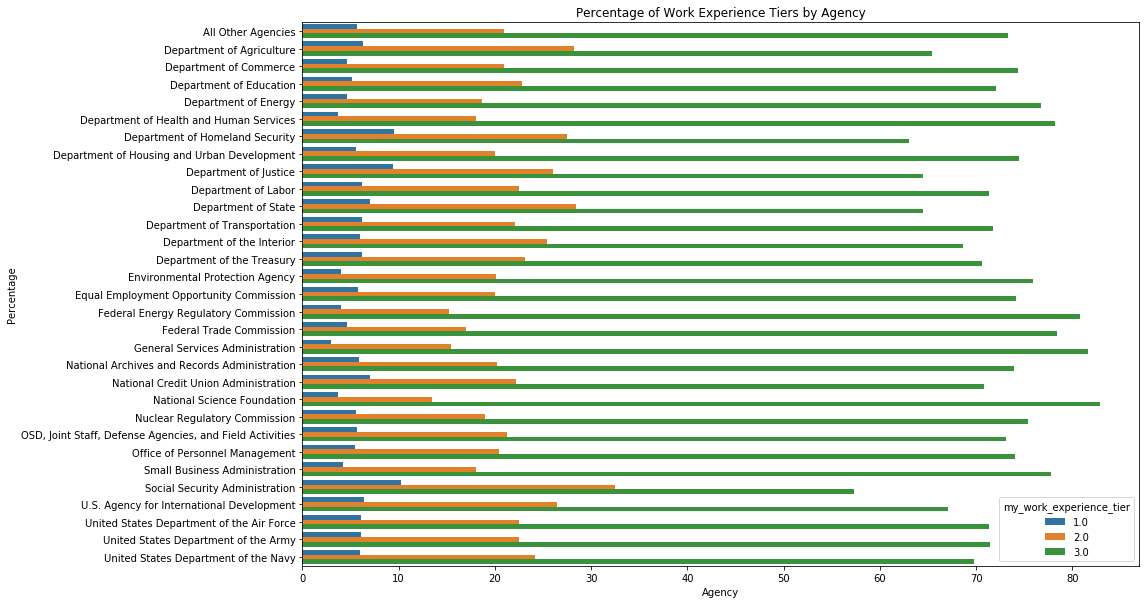

In [108]:
plt.figure(figsize=(15, 10))
sns.barplot(x='percentage', y='AGENCY', hue='my_work_experience_tier', data=my_work_experience_tier_counts)

# Add labels and title
plt.xlabel('Agency')
plt.ylabel('Percentage')
plt.title('Percentage of Work Experience Tiers by Agency')

# Show the plot
plt.show()

In [101]:
my_work_experience_tier_counts.to_clipboard()

In [72]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,my_work_experience_tier
1,1.12971E+11,XX,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,...,All Other Agencies,3.846154,3.722222,3.900000,3.900000,3.800000,4.000000,3.909091,4.0,3.0
2,1.94869E+11,XX,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,...,All Other Agencies,3.923077,3.850000,3.400000,4.800000,2.500000,3.833333,4.000000,4.8,3.0
3,1.52966E+11,XX,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,...,All Other Agencies,4.076923,4.111111,3.800000,4.300000,2.111111,4.000000,4.363636,5.0,3.0
4,1.93041E+11,XX,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,...,All Other Agencies,2.615385,3.200000,2.777778,3.142857,1.833333,1.000000,1.636364,3.6,2.0
5,1.46656E+11,XX,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,All Other Agencies,3.538462,4.400000,3.222222,4.500000,1.777778,2.833333,3.857143,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,...,Department of State,3.461538,3.736842,3.100000,3.300000,2.400000,3.833333,2.928571,4.5,2.0
557775,1.02163e+11,ST,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,Department of State,3.384615,3.850000,3.600000,4.900000,3.600000,3.500000,4.545455,4.2,2.0
557776,1.64068e+11,ST,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,...,Department of State,4.230769,4.000000,4.300000,4.400000,4.200000,4.166667,3.800000,4.4,3.0
557777,1.55255e+11,ST,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,Department of State,4.461538,3.800000,4.400000,4.900000,3.800000,4.666667,3.909091,4.2,3.0


*My Work Unit

In [21]:
my_work_unit =['Q14', 'Q16', 'Q17', 'Q18','Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34']

In [22]:
survey_table[my_work_unit] = survey_table[my_work_unit].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
survey_table[my_work_unit] = survey_table[my_work_unit].apply(pd.to_numeric, errors='coerce')

In [24]:
survey_table['my_work_unit_index'] = survey_table[my_work_unit].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
my_work_unit_index_groupby = survey_table.groupby('AGENCY')['my_work_unit_index'].mean().reset_index()

In [26]:
my_work_unit_index_groupby

,AGENCY,my_work_unit_index
0,All Other Agencies,3.978457
1,Department of Agriculture,3.778819
2,Department of Commerce,3.864093
3,Department of Education,3.979420
4,Department of Energy,4.014278
5,Department of Health and Human Services,4.001743
6,Department of Homeland Security,3.683334
7,Department of Housing and Urban Development,3.979773
8,Department of Justice,3.724516
9,Department of Labor,3.926270


**My Work Unit Index - Buckets 

In [73]:
def work_unit_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['my_work_unit_tier'] = survey_table['my_work_unit_index'].apply(work_unit_bucket)

survey_table['my_work_unit_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    123197
3.0    407537
1.0     27003
Name: my_work_unit_tier, dtype: int64

In [115]:
survey_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557778 entries, 1 to 557778
Columns: 133 entries, RandomID to employee_experience_tier
dtypes: float64(104), object(29)
memory usage: 566.0+ MB


*My Organization

In [27]:
my_organization = ['Q35', 'Q36', 'Q37', 'Q38','Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44']

In [28]:
survey_table[my_organization] = survey_table[my_organization].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
survey_table[my_organization] = survey_table[my_organization].apply(pd.to_numeric, errors='coerce')

In [30]:
survey_table['my_organization_index'] = survey_table[my_organization].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
my_organization_index_groupby = survey_table.groupby('AGENCY')['my_organization_index'].mean().reset_index()

In [32]:
my_organization_index_groupby

,AGENCY,my_organization_index
0,All Other Agencies,3.788522
1,Department of Agriculture,3.632230
2,Department of Commerce,3.837819
3,Department of Education,3.810235
4,Department of Energy,3.928674
5,Department of Health and Human Services,3.957244
6,Department of Homeland Security,3.548823
7,Department of Housing and Urban Development,3.756386
8,Department of Justice,3.567589
9,Department of Labor,3.894003


**My Organization Bucket

In [76]:
def organization_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['my_organization_tier'] = survey_table['my_organization_index'].apply(organization_bucket)

survey_table['my_organization_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    130301
3.0    379251
1.0     39916
Name: my_organization_tier, dtype: int64

*My Supervisor

In [33]:
supervisor = ['Q45', 'Q46', 'Q47', 'Q48','Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54']

In [34]:
survey_table[supervisor] = survey_table[supervisor].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
survey_table[supervisor] = survey_table[supervisor].apply(pd.to_numeric, errors='coerce')

In [36]:
survey_table['supervisor_index'] = survey_table[supervisor].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
supervisor_index_groupby = survey_table.groupby('AGENCY')['supervisor_index'].mean().reset_index()

In [38]:
supervisor_index_groupby

,AGENCY,supervisor_index
0,All Other Agencies,4.254086
1,Department of Agriculture,4.157109
2,Department of Commerce,4.284745
3,Department of Education,4.345552
4,Department of Energy,4.332880
5,Department of Health and Human Services,4.301426
6,Department of Homeland Security,4.057310
7,Department of Housing and Urban Development,4.307146
8,Department of Justice,4.043215
9,Department of Labor,4.278426


**My Supervisor Bucket

In [78]:
def supervisor_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['my_supervisor_tier'] = survey_table['supervisor_index'].apply(supervisor_bucket)

survey_table['my_supervisor_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0     65858
3.0    449545
1.0     30204
Name: my_supervisor_tier, dtype: int64

*Leadership

In [39]:
leadership = ['Q55', 'Q56', 'Q57', 'Q58','Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64']

In [40]:
survey_table[leadership] = survey_table[leadership].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
survey_table[leadership] = survey_table[leadership].apply(pd.to_numeric, errors='coerce')

In [42]:
survey_table['leadership_index'] = survey_table[leadership].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
leadership_index_groupby = survey_table.groupby('AGENCY')['leadership_index'].mean().reset_index()

In [44]:
leadership_index_groupby

,AGENCY,leadership_index
0,All Other Agencies,3.580170
1,Department of Agriculture,3.402016
2,Department of Commerce,3.568648
3,Department of Education,3.632828
4,Department of Energy,3.683964
5,Department of Health and Human Services,3.782065
6,Department of Homeland Security,3.300381
7,Department of Housing and Urban Development,3.670732
8,Department of Justice,3.305478
9,Department of Labor,3.666771


**Leadership Bucket

In [79]:
def leadership_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['leadership_tier'] = survey_table['leadership_index'].apply(leadership_bucket)

survey_table['leadership_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    140642
3.0    312049
1.0     88394
Name: leadership_tier, dtype: int64

*My Satisfaction

In [45]:
my_satisfaction = ['Q65', 'Q66', 'Q67', 'Q68','Q69', 'Q70']

In [46]:
survey_table[my_satisfaction] = survey_table[my_satisfaction].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
survey_table[my_satisfaction] = survey_table[my_satisfaction].apply(pd.to_numeric, errors='coerce')

In [48]:
survey_table['my_satisfaction_index'] = survey_table[my_satisfaction].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
my_satisfaction_index_groupby = survey_table.groupby('AGENCY')['my_satisfaction_index'].mean().reset_index()

In [50]:
my_satisfaction_index_groupby

,AGENCY,my_satisfaction_index
0,All Other Agencies,3.607296
1,Department of Agriculture,3.381343
2,Department of Commerce,3.556084
3,Department of Education,3.626382
4,Department of Energy,3.731459
5,Department of Health and Human Services,3.737435
6,Department of Homeland Security,3.319281
7,Department of Housing and Urban Development,3.694386
8,Department of Justice,3.377020
9,Department of Labor,3.624555


**My Satisfaction Bucket

In [80]:
def satisfaction_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['my_satisfaction_tier'] = survey_table['my_satisfaction_index'].apply(satisfaction_bucket)

survey_table['my_satisfaction_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    145337
3.0    314801
1.0     75803
Name: my_satisfaction_tier, dtype: int64

*DEI

In [51]:
dei =['Q71', 'Q72', 'Q73', 'Q74','Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84']

In [52]:
survey_table[dei] = survey_table[dei].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [53]:
survey_table[dei] = survey_table[dei].apply(pd.to_numeric, errors='coerce')

In [54]:
survey_table['dei_index'] = survey_table[dei].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
dei_index_groupby = survey_table.groupby('AGENCY')['dei_index'].mean().reset_index()

In [56]:
dei_index_groupby

,AGENCY,dei_index
0,All Other Agencies,3.997454
1,Department of Agriculture,3.859978
2,Department of Commerce,3.984408
3,Department of Education,4.012500
4,Department of Energy,4.059161
5,Department of Health and Human Services,4.025969
6,Department of Homeland Security,3.736395
7,Department of Housing and Urban Development,3.990922
8,Department of Justice,3.765358
9,Department of Labor,3.985869


**DEI Bucket

In [81]:
def dei_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['dei_tier'] = survey_table['dei_index'].apply(dei_bucket)

survey_table['dei_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    101900
3.0    398159
1.0     36508
Name: dei_tier, dtype: int64

*Employee Experience

In [57]:
employee_experience = ['Q85', 'Q86', 'Q87', 'Q88','Q89']

In [58]:
survey_table[employee_experience] = survey_table[employee_experience].replace('X', pd.NA)

C:\Users\AaronH\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [59]:
survey_table[employee_experience] = survey_table[employee_experience].apply(pd.to_numeric, errors='coerce')

In [60]:
survey_table['employee_experience_index'] = survey_table[employee_experience].mean(axis=1)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
employee_experience_index_groupby = survey_table.groupby('AGENCY')['employee_experience_index'].mean().reset_index()

In [62]:
employee_experience_index_groupby

,AGENCY,employee_experience_index
0,All Other Agencies,4.017651
1,Department of Agriculture,3.868381
2,Department of Commerce,3.934885
3,Department of Education,4.001667
4,Department of Energy,3.995171
5,Department of Health and Human Services,4.122165
6,Department of Homeland Security,3.791333
7,Department of Housing and Urban Development,3.996003
8,Department of Justice,3.869712
9,Department of Labor,3.998836


**Employee Experience Bucket

In [82]:
def employee_experience_bucket(series):
    if series < 2.5:
        return 1
    elif 2.5 <= series < 3.5:
        return 2
    elif series >= 3.5:
        return 3

survey_table['employee_experience_tier'] = survey_table['employee_experience_index'].apply(employee_experience_bucket)

survey_table['employee_experience_tier'].value_counts(sort=False)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2.0    108964
3.0    390914
1.0     33503
Name: employee_experience_tier, dtype: int64

**MERGE ALL INDEX TABLES

In [90]:
index_tables = [my_work_experience_index_groupby, my_work_unit_index_groupby, my_organization_index_groupby, supervisor_index_groupby, leadership_index_groupby, my_satisfaction_index_groupby, dei_index_groupby, employee_experience_index_groupby, merged_df, my_work_experience_tier_groupby]

NameError: name 'my_work_experience_index_groupby' is not defined

In [273]:
merged_indices = reduce(lambda left, right: pd.merge(left, right, on='AGENCY', how='inner'), index_tables)

In [274]:
merged_indices

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,population,SEP,quit,percentage_quit
0,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381,95248,SC,3868,0.040610
1,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885,49020,SC,2500,0.051000
2,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667,4252,SC,73,0.017168
3,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171,14801,SC,264,0.017837
4,Department of Health and Human Services,3.932961,4.001743,3.957244,4.301426,3.782065,3.737435,4.025969,4.122165,90337,SC,2587,0.028637
5,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333,219092,SC,6587,0.030065
6,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003,8559,SC,124,0.014488
7,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712,116390,SC,2706,0.023249
8,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836,15108,SC,311,0.020585
9,Department of State,3.671787,3.806312,3.643069,4.073497,3.441223,3.448808,3.828897,3.911847,13814,SC,264,0.019111


In [275]:
merged_indices['percentage_q'] = merged_indices['percentage_quit'] * 100

In [276]:
merged_indices

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,population,SEP,quit,percentage_quit,percentage_q
0,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381,95248,SC,3868,0.040610,4.060978
1,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885,49020,SC,2500,0.051000,5.099959
2,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667,4252,SC,73,0.017168,1.716839
3,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171,14801,SC,264,0.017837,1.783663
4,Department of Health and Human Services,3.932961,4.001743,3.957244,4.301426,3.782065,3.737435,4.025969,4.122165,90337,SC,2587,0.028637,2.863721
5,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333,219092,SC,6587,0.030065,3.006500
6,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003,8559,SC,124,0.014488,1.448767
7,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712,116390,SC,2706,0.023249,2.324942
8,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836,15108,SC,311,0.020585,2.058512
9,Department of State,3.671787,3.806312,3.643069,4.073497,3.441223,3.448808,3.828897,3.911847,13814,SC,264,0.019111,1.911105


In [107]:
merged_indices.to_clipboard()

NameError: name 'merged_indices' is not defined

In [277]:
corr_column = 'percentage_q'

In [278]:
correlations = merged_indices.drop(corr_column, axis=1).corrwith(merged_indices[corr_column])

In [279]:
correlations

my_work_experience_index     0.084766
my_work_unit_index           0.013452
my_organization_index        0.032493
supervisor_index            -0.022822
leadership_index            -0.045110
my_satisfaction_index       -0.085017
dei_index                    0.002460
employee_experience_index    0.111483
population                   0.146334
quit                         0.278599
percentage_quit              1.000000
dtype: float64

**MERGE BUCKET VARIABLES

In [ ]:
index_tables = [my_work_experience_index_groupby, my_work_unit_index_groupby, my_organization_index_groupby, supervisor_index_groupby, leadership_index_groupby, my_satisfaction_index_groupby, dei_index_groupby, my_work_experience_tier_groupby, merged_df]

**IMPORT EMPLOYMENT DATABASE

In [12]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\nss-capstone\data\FACTDATA_SEP2023.TXT"

In [13]:
employment = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,6,7,8,12,13,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
employment

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,T,XXXX,2,50,F,1,202309,1,210000,20.3
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,T,XXXX,2,50,F,1,202309,1,203000,30.7
3,AA00,11,F,04,14,E,0905,1,99,GS-14,Q,XXXX,8,30,F,1,202309,1,172075,14.1
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,S,XXXX,8,50,F,1,202309,1,195000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,F,XXXX,8,48,F,2,202309,1,67500,2.5
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,R,XXXX,8,48,I,2,202309,1,184115,0.7
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,50000,0.4
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,56000,0.4


In [68]:
employment_table = employment

In [69]:
employment_table.columns = employment_table.iloc[0]

In [70]:
employment_table = employment_table[1:]

In [71]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,T,XXXX,2,50,F,1,202309,1,210000,20.3
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,T,XXXX,2,50,F,1,202309,1,203000,30.7
3,AA00,11,F,04,14,E,0905,1,99,GS-14,Q,XXXX,8,30,F,1,202309,1,172075,14.1
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,S,XXXX,8,50,F,1,202309,1,195000,12.0
5,AA00,11,G,15,14,E,0905,1,99,GS-14,O,XXXX,8,30,F,1,202309,1,150016,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,F,XXXX,8,48,F,2,202309,1,67500,2.5
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,R,XXXX,8,48,I,2,202309,1,184115,0.7
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,50000,0.4
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,56000,0.4


In [72]:
employment_table['agency'] = employment_table['AGYSUB'].apply(lambda x: x[:2] if x != 'DNFE' else x)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,agency
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,...,XXXX,2,50,F,1,202309,1,210000,20.3,AA
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,...,XXXX,2,50,F,1,202309,1,203000,30.7,AA
3,AA00,11,F,04,14,E,0905,1,99,GS-14,...,XXXX,8,30,F,1,202309,1,172075,14.1,AA
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,...,XXXX,8,50,F,1,202309,1,195000,12.0,AA
5,AA00,11,G,15,14,E,0905,1,99,GS-14,...,XXXX,8,30,F,1,202309,1,150016,11.3,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,67500,2.5,ZS
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,I,2,202309,1,184115,0.7,ZS
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,50000,0.4,ZS
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,56000,0.4,ZS


In [74]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy', 'DNFE':'Federal Energy Regulatory Commission', 'DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [75]:
employment_table['AGENCY'] = employment_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,agency,AGENCY
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,...,2,50,F,1,202309,1,210000,20.3,AA,NaN
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,...,2,50,F,1,202309,1,203000,30.7,AA,NaN
3,AA00,11,F,04,14,E,0905,1,99,GS-14,...,8,30,F,1,202309,1,172075,14.1,AA,NaN
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,...,8,50,F,1,202309,1,195000,12.0,AA,NaN
5,AA00,11,G,15,14,E,0905,1,99,GS-14,...,8,30,F,1,202309,1,150016,11.3,AA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,...,8,48,F,2,202309,1,67500,2.5,ZS,NaN
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,8,48,I,2,202309,1,184115,0.7,ZS,NaN
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,8,48,F,2,202309,1,50000,0.4,ZS,NaN
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,...,8,48,F,2,202309,1,56000,0.4,ZS,NaN


In [77]:
employment_table['AGENCY'] = employment_table['AGENCY'].fillna('missing') 

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
groupby = employment_table.groupby('AGENCY').size().reset_index()

In [79]:
groupby

,AGENCY,0
0,Department of Agriculture,95248
1,Department of Commerce,49020
2,Department of Education,4252
3,Department of Energy,14801
4,Department of Health and Human Services,90337
5,Department of Homeland Security,219092
6,Department of Housing and Urban Development,8559
7,Department of Justice,116390
8,Department of Labor,15108
9,Department of State,13814


In [119]:
employment_table['LOS'] = employment_table['LOS'].apply(pd.to_numeric, errors='coerce')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
groupby_employment = employment_table.groupby('AGENCY')['LOS'].mean().reset_index()

In [121]:
groupby_employment

,AGENCY,LOS
0,Department of Agriculture,12.398677
1,Department of Commerce,12.925910
2,Department of Education,15.125000
3,Department of Energy,14.389676
4,Department of Health and Human Services,12.588123
5,Department of Homeland Security,11.845764
6,Department of Housing and Urban Development,15.201601
7,Department of Justice,12.966167
8,Department of Labor,14.805083
9,Department of State,14.102099


In [281]:
groupby_employment.to_clipboard()

**IMPORT SEPARATIONS DATABASE

In [128]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\SEPDATA_FY2020-2024.TXT"

In [129]:
separations = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,4,5,8,9,13,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
separations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [134]:
separations_table = separations

In [135]:
separations_table.columns = separations_table.iloc[0]

In [137]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
0,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [138]:
separations_table = separations_table[1:]

In [139]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
5,AA00,SA,202003,D,15,14,D,11,0905,1,GS-14,N,XXXX,40,F,2,1,149621,05.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [140]:
separations_table['DATE'] = pd.to_datetime(separations_table['EFDATE'], format='%Y%m')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
separations_table['DATE'] = separations_table['DATE'].dt.to_period('M')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3,2020-06
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9,2022-08
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8,2022-07
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9,2020-08
5,AA00,SA,202003,D,15,14,D,11,0905,1,GS-14,N,XXXX,40,F,2,1,149621,05.3,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5,2021-11
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1,2021-07
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8,2021-03
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8,2021-07


In [145]:
separations_table['DATE_YEAR'] = separations_table['DATE'].dt.year

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,DATE_YEAR
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,L,XXXX,40,F,2,1,125360,12.3,2020-06,2020
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,Q,XXXX,30,F,1,1,176300,12.9,2022-08,2022
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,...,S,XXXX,50,F,1,1,199300,12.8,2022-07,2022
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,L,XXXX,30,F,1,1,121316,04.9,2020-08,2020
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,N,XXXX,40,F,2,1,149621,05.3,2020-03,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,...,Q,XXXX,48,F,2,1,170800,14.5,2021-11,2021
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,...,K,XXXX,38,F,1,1,112930,8.1,2021-07,2021
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,...,M,XXXX,38,F,1,1,133465,8,2021-03,2021
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,...,F,XXXX,38,F,1,1,64682,2.8,2021-07,2021


In [149]:
separations_table['agency'] = separations_table['AGYSUB'].apply(lambda x: x[:2] if x != 'DNFE' else x)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,DATE_YEAR,agency
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,XXXX,40,F,2,1,125360,12.3,2020-06,2020,AA
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,XXXX,30,F,1,1,176300,12.9,2022-08,2022,AA
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,...,XXXX,50,F,1,1,199300,12.8,2022-07,2022,AA
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,XXXX,30,F,1,1,121316,04.9,2020-08,2020,AA
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,XXXX,40,F,2,1,149621,05.3,2020-03,2020,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,...,XXXX,48,F,2,1,170800,14.5,2021-11,2021,ZU
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,...,XXXX,38,F,1,1,112930,8.1,2021-07,2021,ZU
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,...,XXXX,38,F,1,1,133465,8,2021-03,2021,ZU
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,...,XXXX,38,F,1,1,64682,2.8,2021-07,2021,ZU


In [151]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy', 'DNFE':'Federal Energy Regulatory Commission', 'DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [152]:
separations_table['AGENCY'] = separations_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
separations_table['AGENCY'] = separations_table['AGENCY'].fillna('missing') 

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
separations_table_2022 = separations_table[separations_table["DATE_YEAR"] == 2022]

In [215]:
groupby_separations_2022 = separations_table_2022.groupby(['AGENCY', 'SEP']).size().reset_index()

In [216]:
groupby_separations_2022

,AGENCY,SEP,0
0,Department of Agriculture,SA,747
1,Department of Agriculture,SB,50
2,Department of Agriculture,SC,3868
3,Department of Agriculture,SD,1558
4,Department of Agriculture,SF,49
...,...,...,...
238,missing,SG,28
239,missing,SH,2
240,missing,SJ,4564
241,missing,SK,552


In [228]:
groupby_separations_SC = groupby_separations_2022[groupby_separations_2022['SEP']=='SC']

In [234]:
groupby_separations_SC = groupby_separations_SC.rename(columns={0: 'quit'})

In [222]:
groupby_employment_size = employment_table.groupby('AGENCY').size().reset_index(name = 'population')

In [223]:
groupby_employment_size

,AGENCY,population
0,Department of Agriculture,95248
1,Department of Commerce,49020
2,Department of Education,4252
3,Department of Energy,14801
4,Department of Health and Human Services,90337
5,Department of Homeland Security,219092
6,Department of Housing and Urban Development,8559
7,Department of Justice,116390
8,Department of Labor,15108
9,Department of State,13814


In [235]:
groupby_separations_SC

,AGENCY,SEP,quit
2,Department of Agriculture,SC,3868
10,Department of Commerce,SC,2500
20,Department of Education,SC,73
26,Department of Energy,SC,264
35,Department of Health and Human Services,SC,2587
45,Department of Homeland Security,SC,6587
54,Department of Housing and Urban Development,SC,124
63,Department of Justice,SC,2706
71,Department of Labor,SC,311
78,Department of State,SC,264


In [236]:
merged_df = pd.merge(groupby_employment_size, groupby_separations_SC, on='AGENCY', how='inner')

In [238]:
merged_df['percentage_quit'] = merged_df['quit'] / merged_df['population'] 

In [239]:
merged_df

,AGENCY,population,SEP,quit,percentage_quit
0,Department of Agriculture,95248,SC,3868,0.040610
1,Department of Commerce,49020,SC,2500,0.051000
2,Department of Education,4252,SC,73,0.017168
3,Department of Energy,14801,SC,264,0.017837
4,Department of Health and Human Services,90337,SC,2587,0.028637
5,Department of Homeland Security,219092,SC,6587,0.030065
6,Department of Housing and Urban Development,8559,SC,124,0.014488
7,Department of Justice,116390,SC,2706,0.023249
8,Department of Labor,15108,SC,311,0.020585
9,Department of State,13814,SC,264,0.019111


In [52]:
pd.set_option('display.max_rows', 500)

In [44]:
sep = separations_table.groupby('AGYSUB').size()

In [45]:
sep

AGYSUB
AA00         9
AB00        39
AF**         3
AF02        18
AF03        79
AF06       133
AF07       237
AF09       388
AF0B       809
AF0D      1274
AF0J      6763
AF0M      3875
AF0R      2153
AF0V       604
AF12         8
AF13       877
AF16         9
AF17       271
AF1B        43
AF1C      4468
AF1L      3153
AF1M     16059
AF1Q        25
AF1S       512
AF1Y       823
AF20         9
AF2A        18
AF2E        53
AF2F        13
AF2H         6
AF2I       237
AF2K         7
AF2L       117
AF2M        23
AF2R         7
AF2S        35
AF2T        20
AF2Z       119
AF34        10
AF38        36
AF3C       132
AF3D       350
AF3Q       455
AF3T       276
AF3V        90
AF40       392
AF4C       116
AF4D       265
AF4F        27
AF4G      1300
AF4S        73
AF4V       234
AF4W       681
AF5D        23
AF6F       383
AFGS      1771
AFNG     17030
AFZG       228
AG01        97
AG02      1436
AG03      3536
AG07      1250
AG08        71
AG10       315
AG11     34210
AG13        14
AG1

In [50]:
separations_table['AGENCY'] = separations_table['AGYSUB'].str[:2]

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,YEAR,MONTH,AGENCY
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,40,F,2,1,125360,12.3,2020-06,2020,6,AA
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,30,F,1,1,176300,12.9,2022-08,2022,8,AA
3,AA00,SC,202207,H,15,,E,11,0301,2,...,50,F,1,1,199300,12.8,2022-07,2022,7,AA
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,30,F,1,1,121316,04.9,2020-08,2020,8,AA
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,40,F,2,1,149621,05.3,2020-03,2020,3,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,,E,11,0301,2,...,48,F,2,1,170800,14.5,2021-11,2021,11,ZU
717109,ZU00,SJ,202107,E,17,,D,11,0301,2,...,38,F,1,1,112930,08.1,2021-07,2021,7,ZU
717110,ZU00,SA,202103,K,13,,D,11,0301,2,...,38,F,1,1,133465,08.0,2021-03,2021,3,ZU
717111,ZU00,SJ,202107,C,13,,B,11,0301,2,...,38,F,1,1,064682,02.8,2021-07,2021,7,ZU


In [54]:
agency = separations_table.groupby('AGENCY')

In [55]:
agency

AGENCY
AA         9
AB        39
AF     67120
AG     52325
AH       206
AM       995
AN        28
AP         6
AR     89620
AU        40
AW        20
BD        64
BF        26
BG       297
BH        10
BK         2
BO       318
BT        14
BW         4
CC        20
CE        42
CF         1
CM     28658
CT       178
CU       253
DB         3
DD     44884
DG         3
DJ     26689
DL      3823
DN      3983
DQ         5
EB       173
EC       152
ED      1123
EE       636
EO        12
EP      3552
EQ        14
EW        25
FC       316
FD      1770
FI         2
FJ        22
FK         2
FL       113
FM        42
FQ       193
FR       379
FT       366
FW        50
GB       174
GC         5
GE         1
GG        13
GJ       160
GQ        46
GS      2740
GU         1
GW        80
GX        30
GY         6
GZ         9
HB        16
HD        31
HE     21175
HF       227
HP        15
HS     50816
HT         3
HU      2097
HW        13
IB       284
IF        24
IG        20
IN     40429
IP   

In [56]:
agency_sep_type = separations_table.groupby('AGENCY')['SEP'].sum()

**GRAPHS

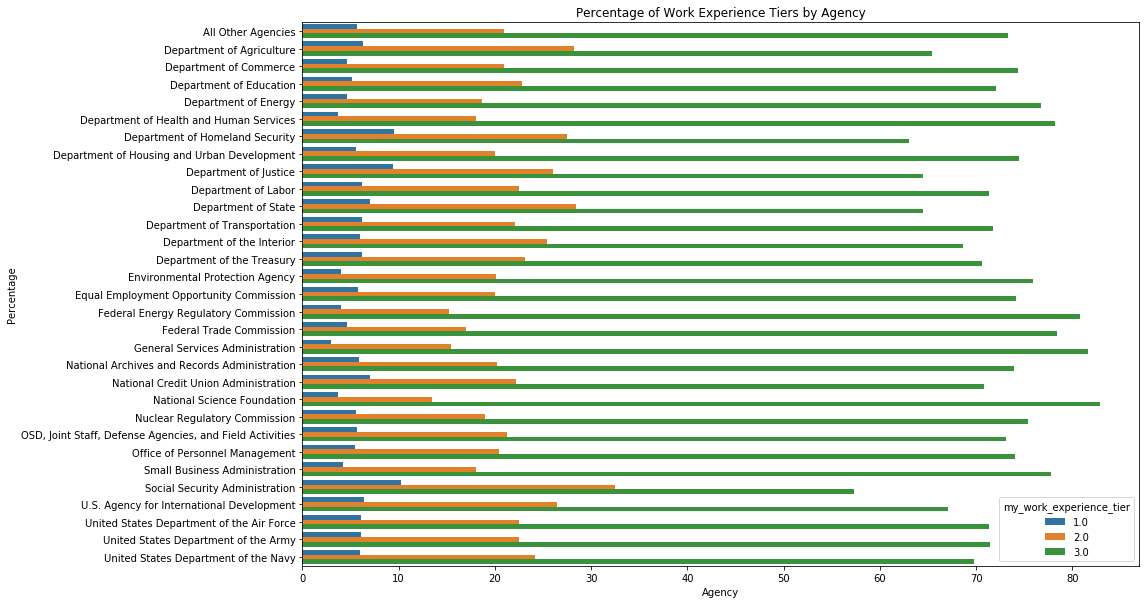

In [109]:
plt.figure(figsize=(15, 10))
sns.barplot(x='percentage', y='AGENCY', hue='my_work_experience_tier', data=my_work_experience_tier_counts)

# Add labels and title
plt.xlabel('Agency')
plt.ylabel('Percentage')
plt.title('Percentage of Work Experience Tiers by Agency')

# Show the plot
plt.show()

In [111]:
my_supervisor_tier_counts = survey_table.groupby(['AGENCY', 'my_supervisor_tier']).size().reset_index(name='count')
agency_totals = my_supervisor_tier_counts.groupby('AGENCY')['count'].transform('sum')
my_supervisor_tier_counts['percentage'] = (my_supervisor_tier_counts['count'] / agency_totals) * 100

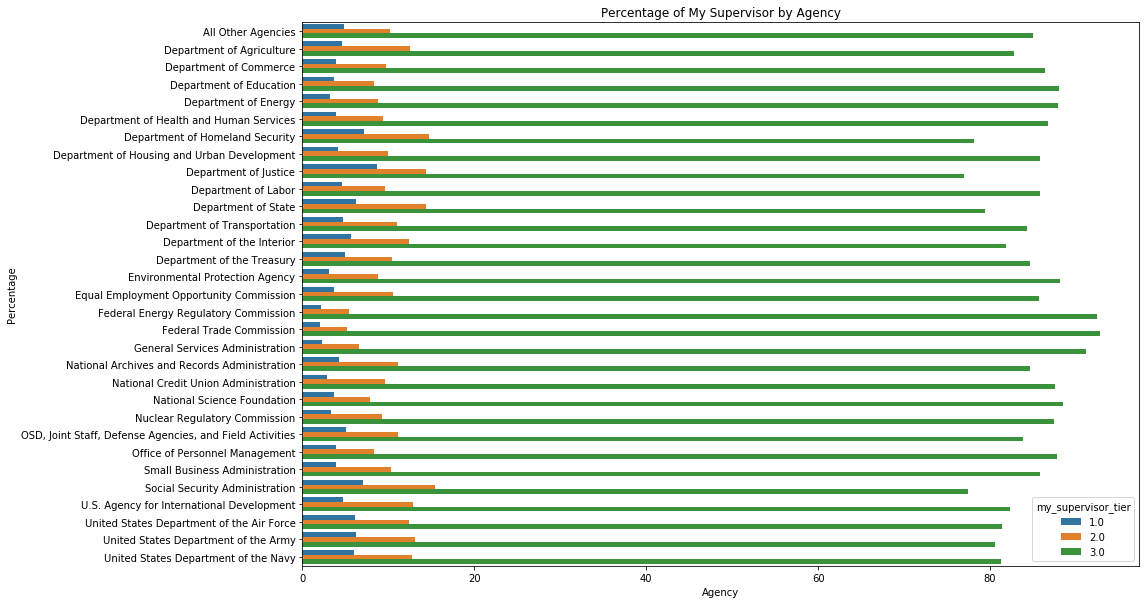

In [112]:
plt.figure(figsize=(15, 10))
sns.barplot(x='percentage', y='AGENCY', hue='my_supervisor_tier', data=my_supervisor_tier_counts)

# Add labels and title
plt.xlabel('Agency')
plt.ylabel('Percentage')
plt.title('Percentage of My Supervisor by Agency')

# Show the plot
plt.show()

In [113]:
my_satisfaction_tier_counts = survey_table.groupby(['AGENCY', 'my_satisfaction_tier']).size().reset_index(name='count')
agency_totals = my_satisfaction_tier_counts.groupby('AGENCY')['count'].transform('sum')
my_satisfaction_tier_counts['percentage'] = (my_satisfaction_tier_counts['count'] / agency_totals) * 100

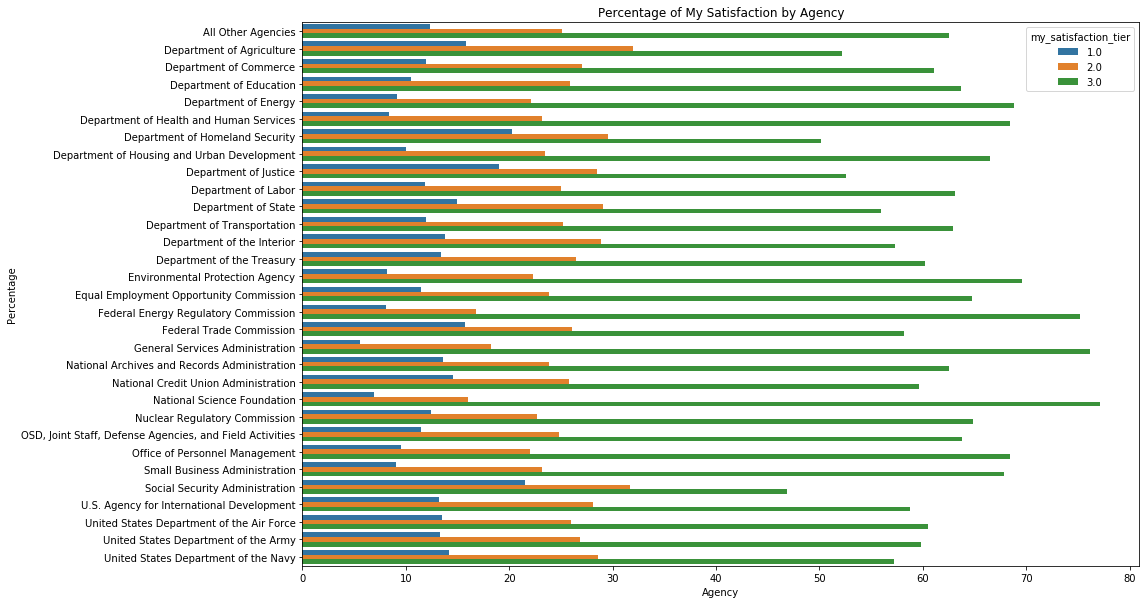

In [114]:
plt.figure(figsize=(15, 10))
sns.barplot(x='percentage', y='AGENCY', hue='my_satisfaction_tier', data=my_satisfaction_tier_counts)

# Add labels and title
plt.xlabel('Agency')
plt.ylabel('Percentage')
plt.title('Percentage of My Satisfaction by Agency')

# Show the plot
plt.show()